In [60]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
from geoid.censusnames import stusab

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()

from shapely.geometry import Point


In [61]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

# Starbucks Locations
`chrismeller.github.com-starbucks-1.1.1` Last Update: 2021-02-24T01:29:21

_A list of Starbucks locations, scraped from the web in 2017_


Starbucks locations scraped from the Starbucks website by Chris Meller. From the original README: 


    Contains a single commit for each day that batches up all changes to the Starbucks dataset as a CSV file.

    Deletes will obviously be stores that seem to have closed and adds are new stores that have opened.

    This is a work in progress. There is additional data that needs to be included in this dataset and it needs to get properly automated so we hav e a regular commit daily at a particular time.
## Documentation Links

* [Source](https://github.com/chrismeller/StarbucksLocations) Github page for the datafile source

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [all_starbucks](https://github.com/chrismeller/StarbucksLocations/raw/master/stores.csv)**. List of Starbucks locations.
* ** [us_starbucks](notebooks/convert.ipynb#ussb)**. Geo file of starbucks in the US

## References
<ul><li> <strong>states</string>, <em>censusgeo://2019/5/US/state</em>. US States</li><ul>

In [52]:
df = pkg.resource('all_starbucks').dataframe().dropna(subset=['Longitude','Latitude'])

In [38]:
states = pkg.reference('states').geoframe().to_crs(4326)[['geoid','geometry']]


<AxesSubplot:>

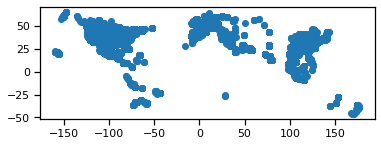

In [53]:

df['geometry'] = df.apply(lambda r: Point(r.Longitude, r.Latitude), axis=1)
df = gpd.GeoDataFrame(df, crs=4326)
ussb = gpd.overlay(df, states) # Starbucks in the US


<AxesSubplot:>

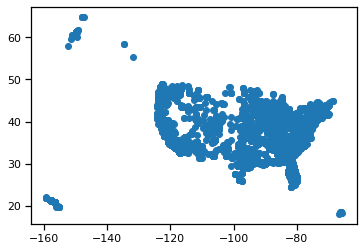

In [59]:
ussb.plot()